# Exploratory Data Analysis

## Observations, Insights and Actionables

From Exploratory Data Analysis (EDA), we hope to derive more data-informed decision-making for restaurateurs both current and prospective. These findings are based on our dataset and the preliminary data-cleaning we have done in the previous step.

#### We have scraped from 2 subreddits: [r/Meat](https://www.reddit.com/r/Meat/) and [r/Vegan](https://www.reddit.com/r/Vegan/)


**Based on current analysis, here are some overall descriptive statistics about scraped Subreddits:**
* 5708 Reddit Posts scraped total, 2390 posts from r/Meat and 3318 posts from r/Vegan
* Average score post for r/Meat is 193 and Average score post for r/Vegan is 1756
* Extracted r/Meat posts for 8 years from timeframe in June 2016 to Sep 2023
* Earliest  r/Vegan posts for 8 years from timeframe in Mar 2016 to Sep 2023

**Time-based Descriptive Statistics:**




**From Current Dataset of 5708 rows:**
* 1864 out of 2390 Meat posts have no body text (78%)
* 2029 out of 3318 Vegan posts have no body text (61%)
* Posts with Bodytext consist of 1815 rows

### r/Meat Observations
- Average Polarity of topics is positive (>0.05) while subjective is lower than r/Vegan


**Most frequently occurring themes include: e.g word/phrase (frequency) **

*Unigram:*
* Meat: Beef (102), Pork (44), Chicken (32)
* Cooking Style: Steak(s) (63), Brisket (19), Ribeye (17) 

*Bigram:*
* Types of Meat Cuts: Ground Beef (17), Pork Shoulder (6)
* Preferences: Safe Eat (7), High Quality (4)
* Concerns: Nitrates Nitrites (6), Processed Meats (5)

*Trigram:*
* Cooking-Based Focuses: Nitrite Pickling Salt (3), Favourite Marinades (3)

*Quart-gram:*
* Storage: Safety (3), Meat Aging (2), Refigeration (2)



### r/Vegan Observations
- Average Polarity of topics is neutral (within 0.05 range) while subjective is higher than r/Vegan

**Most frequently occurring themes include: e.g word/phrase (frequency) **

*Unigram:*
* Foodstuffs: Milk (212), Dairy (191), Cheese (116)
* Nutrition: Diet (197), Health (119), Protein (102)

*Bigram:*
* Animal-Based Concerns: Animal Rights (32), Animal Cruely (24), Animal Welfare (19)
* Specific Vegan Preferences: Plant Based (63), Ice Cream (35), Oat Milk (24)
* Areas of Questioning: Vegan Options (36), Vegan Restaurent (19), Vegan Recipes (14)

*Trigram:*
* Values: Stop Eating Meat (8), Rights Moral consideration (4), Veganism Morally Superior (3)
* Specific Foodstuffs: Lays Chaat (7), Lab Grown Meat (5), Vegan Ice Cream (4), Marble Cake (4)
* Recipes: Lays Chaat (7), Chili Garlic Noodles (4), Vegan Cheese Pizza (3)



### Steps Required for Modelling 



In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import datetime
import nltk
import string
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [36]:
original_df = pd.read_csv("../data/merged_posts.csv")

In [37]:
#merged already, all lowercase, emojis and punctuation removed
original_df.head()

,title,score,id,url,created,body,subreddit
0,What’s a good price for meats?,18,zowntt,https://www.reddit.com/r/meat/comments/zowntt/...,1.671363e+09,"I just recently moved to the US, specifically ...",meat
1,Why does the restaurant think this is Medium?,50,16o84am,https://i.redd.it/vrle578fvjpb1.jpg,1.695277e+09,NaN,meat
2,Why do deli hams flower like this when at thei...,11,16o8zfs,https://i.redd.it/ez2gndtg4kpb1.png,1.695280e+09,NaN,meat
3,Snake River Farms Wagyu Short Rib. Melts like ...,62,16n6emt,https://www.reddit.com/gallery/16n6emt,1.695168e+09,Only needs to kiss hot pan for a few seconds a...,meat
4,where do you guys get fat/tallow for cheap?,42,16mnurg,https://www.reddit.com/r/meat/comments/16mnurg...,1.695121e+09,My parents told me butchers used to throw away...,meat


In [4]:
original_df.shape

(5708, 7)

# Post Score
A submission's score is simply the number of upvotes minus the number of downvotes. 

In [5]:
original_df.groupby("subreddit").describe()

score                                                       \
            count         mean          std  min   25%    50%      75%   
subreddit                                                                
meat       2390.0   193.674059   198.186993  0.0  36.0  142.0   294.00   
vegan      3318.0  1756.301386  2325.906117  0.0  16.0  769.5  3455.75   

                   created                                            \
               max   count          mean           std           min   
subreddit                                                              
meat        2228.0  2390.0  1.664178e+09  2.899345e+07  1.528938e+09   
vegan      29334.0  3318.0  1.653410e+09  5.674250e+07  1.457187e+09   

                                                                   
                    25%           50%           75%           max  
subreddit                                                          
meat       1.654471e+09  1.673113e+09  1.684027e+09  1.695280e+09  
vegan      1.611952e+09  1.682538e+09  1.694108e+09  1.695310e+09

# Conversion Time

To convert values in created column from Unix format to DateTime format using `datetime`

In [6]:
# Change created time from unix to dateimte
original_df['created'] = pd.to_datetime(original_df['created'],unit='s')
original_df.head()

,title,score,id,url,created,body,subreddit
0,What’s a good price for meats?,18,zowntt,https://www.reddit.com/r/meat/comments/zowntt/...,2022-12-18 11:35:43,"I just recently moved to the US, specifically ...",meat
1,Why does the restaurant think this is Medium?,50,16o84am,https://i.redd.it/vrle578fvjpb1.jpg,2023-09-21 06:08:23,NaN,meat
2,Why do deli hams flower like this when at thei...,11,16o8zfs,https://i.redd.it/ez2gndtg4kpb1.png,2023-09-21 07:00:01,NaN,meat
3,Snake River Farms Wagyu Short Rib. Melts like ...,62,16n6emt,https://www.reddit.com/gallery/16n6emt,2023-09-19 23:57:54,Only needs to kiss hot pan for a few seconds a...,meat
4,where do you guys get fat/tallow for cheap?,42,16mnurg,https://www.reddit.com/r/meat/comments/16mnurg...,2023-09-19 10:58:21,My parents told me butchers used to throw away...,meat


In [7]:
# Finding time frames of posts
df = original_df[["subreddit", "created"]]
df.groupby("subreddit").describe()
# Earliest meat post in June 2016 to Sep 2023
# Earliest vegan post in Mar 2016 to Sep 2023

created                                                        \
            count unique                  top freq                first   
subreddit                                                                 
meat         2390   2390  2022-12-18 11:35:43    1  2018-06-14 01:04:00   
vegan        3318   3318  2022-09-01 10:52:29    1  2016-03-05 14:03:15   

                                
                          last  
subreddit                       
meat       2023-09-21 07:00:01  
vegan      2023-09-21 15:23:17

In [8]:
#split by subreddit and add time columns
def split_time(subreddit):
    df = original_df
    df = df[df["subreddit"] == subreddit]
    df['day'] = df['created'].dt.day
    df['month'] = df['created'].dt.month
    df['year'] = df['created'].dt.year
    df['hour'] = df["created"].dt.strftime('%H')
    return df

df_meat = split_time("meat")
df_vegan = split_time("vegan")

print(df_meat.shape)
print(df_vegan.shape)

(2390, 11)
(3318, 11)


# Time-Based Analysis 

Analysis of r/Meat posts and r/Vegan posts. Due to demographic, analysis of such posts might yield insights on certain behaviours.

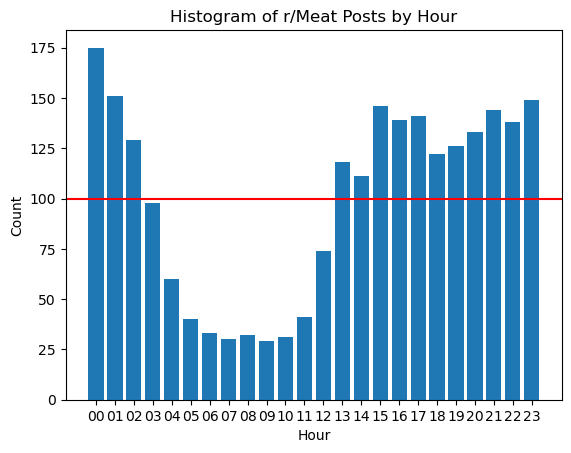

In [9]:
# Group posts by hour
hourly_counts = df_meat.groupby('hour').size()

# Plot the histogram
plt.bar(hourly_counts.index, hourly_counts.values)

# Set the labels and title
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Histogram of r/Meat Posts by Hour')
plt.axhline(y = hourly_counts.values.mean(), color = 'r', linestyle = '-')

# Display the plot
plt.show()

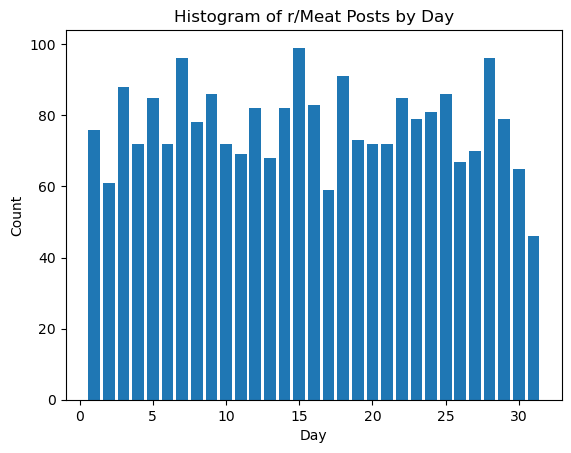

In [10]:
# Group posts by day
daily_counts = df_meat.groupby('day').size()

# Plot the histogram
plt.bar(daily_counts.index, daily_counts.values)

# Set the labels and title
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Histogram of r/Meat Posts by Day')

# Display the plot
plt.show()

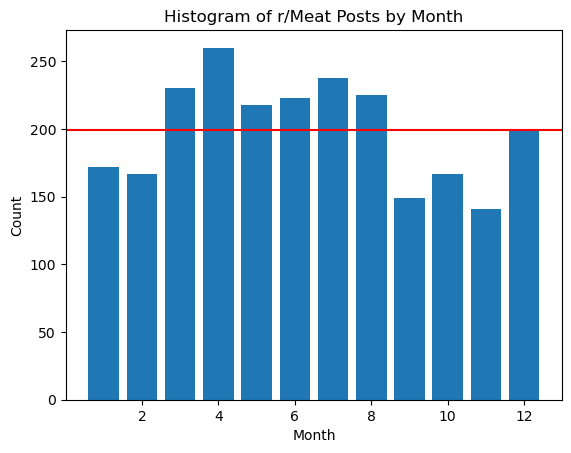

In [11]:
# Group posts by Month
monthly_counts = df_meat.groupby('month').size()

# Plot the histogram
plt.bar(monthly_counts.index, monthly_counts.values)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Histogram of r/Meat Posts by Month')
plt.axhline(y = monthly_counts.values.mean(), color = 'r', linestyle = '-')

# Display the plot
plt.show()

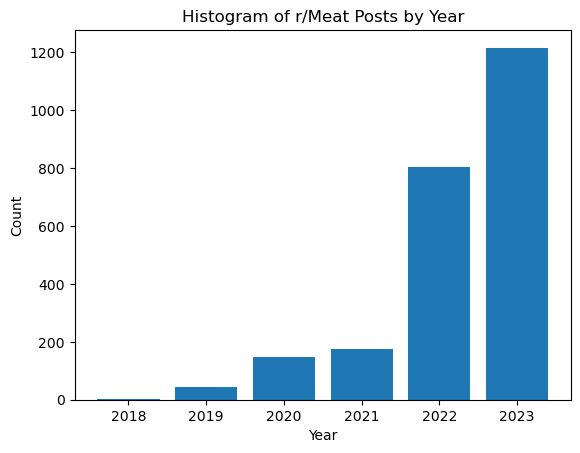

In [12]:
# Group posts by Year
yearly_counts = df_meat.groupby('year').size()

# Plot the histogram
plt.bar(yearly_counts.index, yearly_counts.values)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Histogram of r/Meat Posts by Year')

# Display the plot
plt.show()

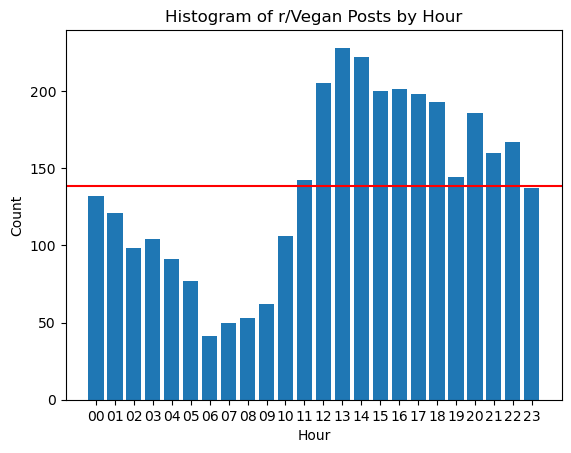

In [13]:
# Group posts by hour
hourly_counts = df_vegan.groupby('hour').size()

# Plot the histogram
plt.bar(hourly_counts.index, hourly_counts.values)

# Set the labels and title
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Histogram of r/Vegan Posts by Hour')
plt.axhline(y = hourly_counts.values.mean(), color = 'r', linestyle = '-')

# Display the plot
plt.show()

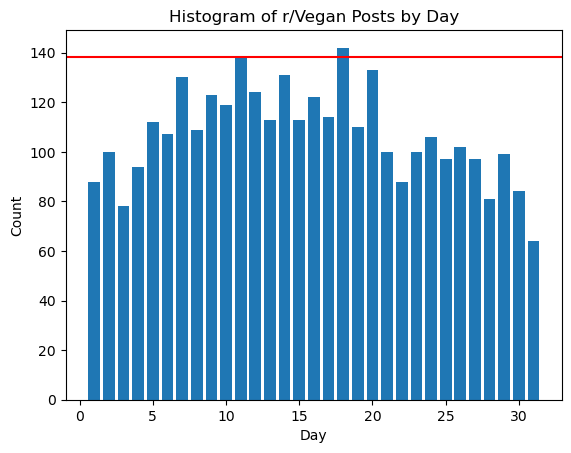

In [14]:
# Group posts by day
daily_counts = df_vegan.groupby('day').size()

# Plot the histogram
plt.bar(daily_counts.index, daily_counts.values)

# Set the labels and title
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Histogram of r/Vegan Posts by Day')
plt.axhline(y = hourly_counts.values.mean(), color = 'r', linestyle = '-')

# Display the plot
plt.show()

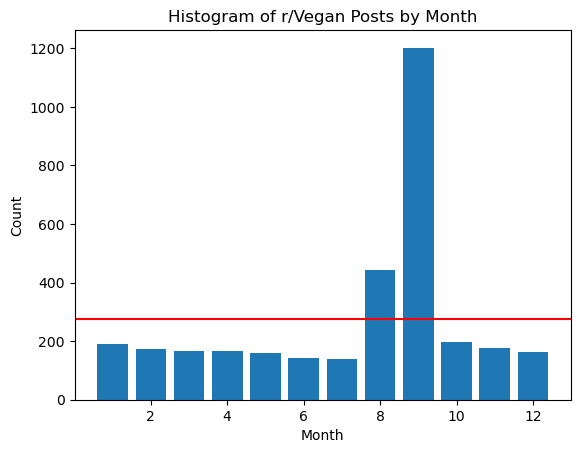

In [15]:
# Group posts by Month
monthly_counts = df_vegan.groupby('month').size()

# Plot the histogram
plt.bar(monthly_counts.index, monthly_counts.values)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Histogram of r/Vegan Posts by Month')
plt.axhline(y = monthly_counts.values.mean(), color = 'r', linestyle = '-')

# Display the plot
plt.show()

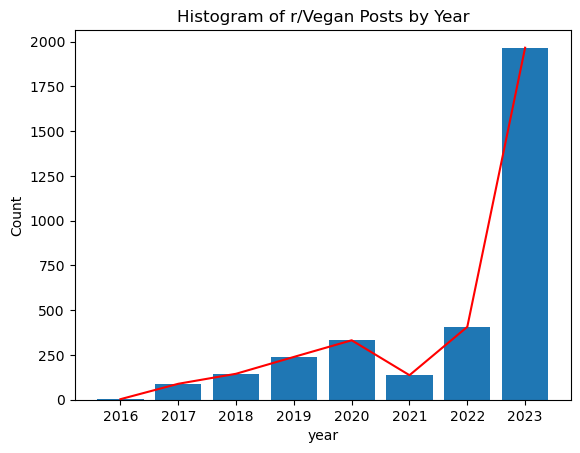

In [16]:
# plot yearly graph vegan
x = df_vegan.groupby('year').size()


# Plot the histogram
plt.bar(x.index, x.values)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Count')
x.plot(x="year", y="count", kind="line", color = "r")
plt.title('Histogram of r/Vegan Posts by Year')

# Display the plot
plt.show()

# 5708 Posts: 2390 Meat Posts and 3318 Vegan Posts

In [17]:
# How many vegan and meat?
original_df.groupby("subreddit").count()

,title,score,id,url,created,body
subreddit,,,,,,
meat,2390,2390,2390,2390,2390,526
vegan,3318,3318,3318,3318,3318,1289


### A lot of potentially Media/Non-Text related Posts 

In 5708 posts, 3893 posts (68.2%) do not contain body text, only titles.

In [18]:
original_df.isna().sum()

title           0
score           0
id              0
url             0
created         0
body         3893
subreddit       0
dtype: int64

### How many posts have external url links?

4337 rows out of 5708 rows. (76%)

In [19]:
df = original_df
x = df[~df["url"].str.contains("/comments/")]

# count rows with these urls 
x

,title,score,id,url,created,body,subreddit
1,Why does the restaurant think this is Medium?,50,16o84am,https://i.redd.it/vrle578fvjpb1.jpg,2023-09-21 06:08:23,NaN,meat
2,Why do deli hams flower like this when at thei...,11,16o8zfs,https://i.redd.it/ez2gndtg4kpb1.png,2023-09-21 07:00:01,NaN,meat
3,Snake River Farms Wagyu Short Rib. Melts like ...,62,16n6emt,https://www.reddit.com/gallery/16n6emt,2023-09-19 23:57:54,Only needs to kiss hot pan for a few seconds a...,meat
6,The United States is Getting a New $140 Millio...,9,16mfvwr,https://www.thenew.money/article/the-united-st...,2023-09-19 03:15:48,NaN,meat
7,Weston Grinder Differences,1,16mufzf,https://westonbrands.com/weston-12-electric-me...,2023-09-19 15:43:38,The Weston #12 (linked) and the Weston #22 but...,meat
...,...,...,...,...,...,...,...
5703,"48,000 PEOPLE WANT STARBUCKS TO STOP CHARGING ...",3275,ckyt4u,https://www.livekindly.com/starbucks-stop-char...,2019-08-02 03:37:48,NaN,vegan
5704,When you see a non vegan recipe,3264,aksvtk,https://i.redd.it/j9uykvm9o8d21.jpg,2019-01-28 22:19:34,NaN,vegan
5705,Isn’t Nature Beautiful?,3260,nr0iiv,https://i.redd.it/akyqn6c13y271.jpg,2021-06-03 00:25:34,NaN,vegan
5706,We can come at y'all like that too!,3263,f5w5v5,https://i.redd.it/o4dr88np5qh41.jpg,2020-02-18 18:21:51,NaN,vegan


# From Current Dataset of 5708 rows

* 1864 of Meat posts have no body text (78%)
* 2029 rows of Vegan posts have no body text (61%)
* If remove just all null body rows, there would be 1815 rows

In [20]:
df = original_df
df_body_null = df["body"].isnull()
body_null_rows = df[~df_body_null]

body_null_rows

,title,score,id,url,created,body,subreddit
0,What’s a good price for meats?,18,zowntt,https://www.reddit.com/r/meat/comments/zowntt/...,2022-12-18 11:35:43,"I just recently moved to the US, specifically ...",meat
3,Snake River Farms Wagyu Short Rib. Melts like ...,62,16n6emt,https://www.reddit.com/gallery/16n6emt,2023-09-19 23:57:54,Only needs to kiss hot pan for a few seconds a...,meat
4,where do you guys get fat/tallow for cheap?,42,16mnurg,https://www.reddit.com/r/meat/comments/16mnurg...,2023-09-19 10:58:21,My parents told me butchers used to throw away...,meat
5,"Pork feet, ears and skin",1,16mygbt,https://www.reddit.com/r/meat/comments/16mygbt...,2023-09-19 18:26:24,"I’ve been looking for trotters, ears and pig s...",meat
7,Weston Grinder Differences,1,16mufzf,https://westonbrands.com/weston-12-electric-me...,2023-09-19 15:43:38,The Weston #12 (linked) and the Weston #22 but...,meat
...,...,...,...,...,...,...,...
5534,Today is my 10 year vegan anniversary!,3481,i3hu34,https://www.reddit.com/r/vegan/comments/i3hu34...,2020-08-04 11:44:39,Looking for a pat on the back from the reddit ...,vegan
5566,I’m officially going Vegan. After watching “Se...,3449,mgrh27,https://www.reddit.com/r/vegan/comments/mgrh27...,2021-03-30 22:16:50,I have two younger sisters that have been Vega...,vegan
5581,"I don't understand, people out here saying, ""I...",3416,i43n68,https://www.reddit.com/r/vegan/comments/i43n68...,2020-08-05 11:32:11,Read it somewhere on ig,vegan
5675,Oat milk is better than almond milk,3310,nnnz2h,https://www.reddit.com/r/vegan/comments/nnnz2h...,2021-05-29 13:55:30,Even cashew milk is better than almond milk. A...,vegan


In [21]:
body_null_rows.groupby("subreddit").count()

,title,score,id,url,created,body
subreddit,,,,,,
meat,526,526,526,526,526,526
vegan,1289,1289,1289,1289,1289,1289


# Let's remove both null body rows and URL to be completely OG text content-based posting

In [22]:
df = original_df 

#Take all non-nulls bodytext posts
df_body_null = df["body"].isnull()
df = df[~df_body_null]

#Remove url to photos
df_allfull = df[df["url"].str.contains("/comments/")]
#df.loc[7,"url"]
df_allfull #1294 rows

,title,score,id,url,created,body,subreddit
0,What’s a good price for meats?,18,zowntt,https://www.reddit.com/r/meat/comments/zowntt/...,2022-12-18 11:35:43,"I just recently moved to the US, specifically ...",meat
4,where do you guys get fat/tallow for cheap?,42,16mnurg,https://www.reddit.com/r/meat/comments/16mnurg...,2023-09-19 10:58:21,My parents told me butchers used to throw away...,meat
5,"Pork feet, ears and skin",1,16mygbt,https://www.reddit.com/r/meat/comments/16mygbt...,2023-09-19 18:26:24,"I’ve been looking for trotters, ears and pig s...",meat
11,best place to buy meat online,11,16lv56c,https://www.reddit.com/r/meat/comments/16lv56c...,2023-09-18 13:10:13,Just went to omaha steaks and they want 25$ pe...,meat
15,How to cook pectoral meat?,0,16la02u,https://www.reddit.com/r/meat/comments/16la02u...,2023-09-17 19:39:57,"I got a 1.7lb pectoral cut, naively thinking i...",meat
...,...,...,...,...,...,...,...
5534,Today is my 10 year vegan anniversary!,3481,i3hu34,https://www.reddit.com/r/vegan/comments/i3hu34...,2020-08-04 11:44:39,Looking for a pat on the back from the reddit ...,vegan
5566,I’m officially going Vegan. After watching “Se...,3449,mgrh27,https://www.reddit.com/r/vegan/comments/mgrh27...,2021-03-30 22:16:50,I have two younger sisters that have been Vega...,vegan
5581,"I don't understand, people out here saying, ""I...",3416,i43n68,https://www.reddit.com/r/vegan/comments/i43n68...,2020-08-05 11:32:11,Read it somewhere on ig,vegan
5675,Oat milk is better than almond milk,3310,nnnz2h,https://www.reddit.com/r/vegan/comments/nnnz2h...,2021-05-29 13:55:30,Even cashew milk is better than almond milk. A...,vegan


In [35]:
#From 1294 Rows
#207 meats and 1087 vegans
df_allfull.groupby("subreddit").describe()

score                                                       
            count        mean         std  min  25%   50%    75%     max
subreddit                                                               
meat        207.0    4.898551   11.791240  0.0  1.0   1.0    3.5   101.0
vegan      1087.0  275.404784  691.072567  0.0  2.0  12.0  234.0  9178.0

# N-Grams Classification

In [24]:
# To count top keywords
df = original_df 

#Take all non-nulls bodytext posts
df_body_null = df["body"].isnull()
df = df[~df_body_null]

#Remove url to photos
df = df[df["url"].str.contains("/comments/")]
#df.loc[7,"url"]
df #1294 rows


#Only context content analysis of only full bodytext posts
trytry = df[["subreddit", "title", "body"]]
meat = trytry[trytry["subreddit"] == "meat"]
vegan = trytry[trytry["subreddit"] == "vegan"]

trytry["titbod"] = trytry["title"] + trytry["body"]
meat["titbod"] = meat["title"] + meat["body"]
vegan["titbod"] = vegan["title"] + vegan["body"]

In [25]:
df_list = [meat, vegan, trytry]

# o is meat, 1 is vegan, 2 is allsubreddits
df = df_list[1]

#Remove punctuation
def remove_punct(text):
    # store character only if it is not a punctuation
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct


# Remove any residual punctuation
words = ""
sentences = df["titbod"].values.tolist()
for sentence in sentences:
    words += remove_punct(str(sentence).lower())


words = words.split()

# Count the occurrences of each word
word_counts = Counter(words)

def count_bigrams(x):
    bigrams = [tuple(x[i:i+2]) for i in range(len(x)-1)]
    bigram_counts = Counter(bigrams)
    return bigram_counts

def count_trigrams(x):
    trigrams = [tuple(x[i:i+3]) for i in range(len(x)-1)]
    trigram_counts = Counter(trigrams)
    return trigram_counts


# Display or analyze the word counts
print(word_counts)

Counter({'i': 5425, 'to': 5162, 'the': 4890, 'and': 4785, 'a': 3838, 'of': 2756, 'that': 2175, 'vegan': 1990, 'it': 1966, 'for': 1962, 'in': 1842, 'is': 1821, 'my': 1657, 'but': 1441, 'with': 1163, 'this': 1159, 'have': 1142, 'so': 1093, 'not': 1089, 'are': 1086, 'you': 1064, 'on': 1059, 'me': 997, 'be': 978, 'they': 972, 'was': 969, 'just': 870, 'if': 843, 'about': 841, 'as': 828, 'or': 823, 'like': 763, 'at': 654, 'we': 651, 'people': 646, 'im': 625, 'all': 621, 'do': 595, 'what': 568, 'some': 536, 'he': 531, 'them': 524, 'can': 520, 'how': 511, 'because': 509, 'would': 497, 'its': 485, 'an': 481, 'meat': 480, 'animals': 473, 'animal': 466, 'from': 463, 'any': 460, 'dont': 456, 'when': 454, 'know': 442, 'been': 431, 'there': 430, 'out': 429, 'food': 420, 'more': 415, 'eat': 413, 'being': 413, 'their': 395, 'get': 384, 'want': 384, 'no': 383, 'i’m': 382, 'one': 378, 'even': 376, 'your': 367, 'up': 367, 'has': 365, 'she': 365, 'make': 358, 'had': 354, 'am': 352, 'think': 344, 'really':

            Word  Frequency
12         vegan       1990
108       people        646
267         meat        480
2        animals        473
20        animal        466
660         good        284
105     veganism        269
16        vegans        261
116         milk        212
293         diet        197
1105       dairy        191
103         well        156
99    vegetarian        137
152         told        135
630          bad        133
315         live        120
95        health        119
229         care        118
1091      cheese        116
297         stop        115


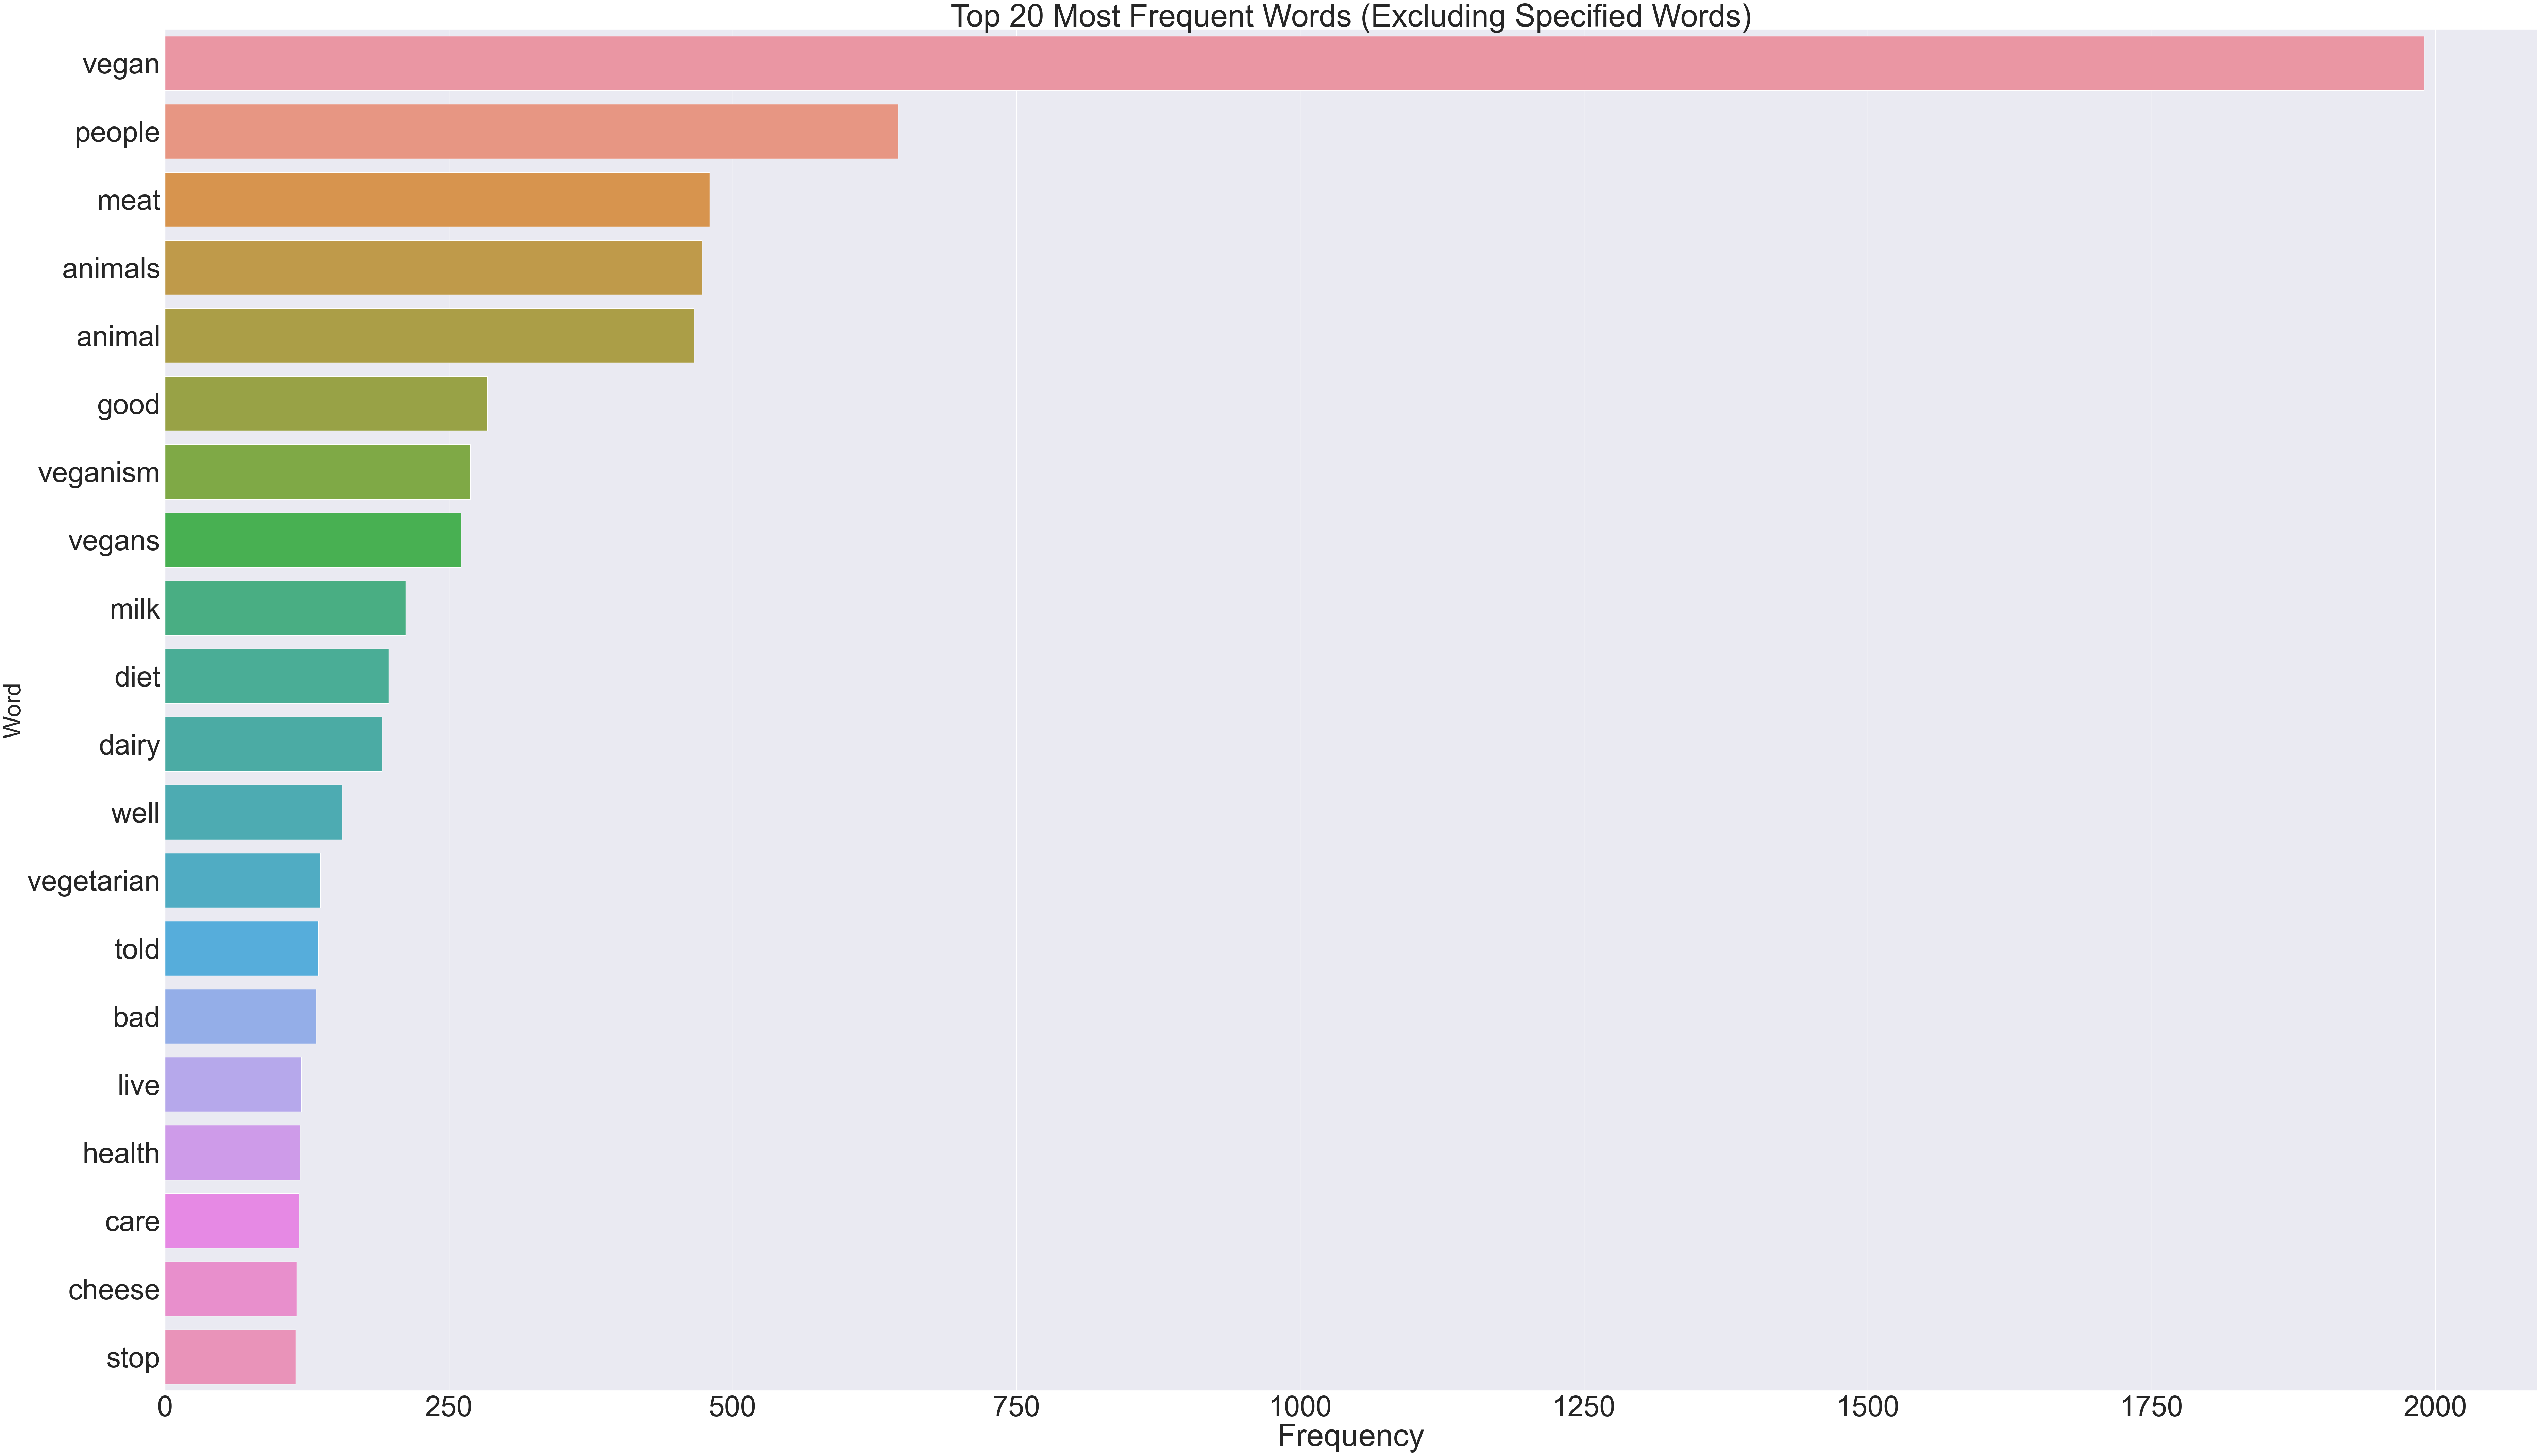

In [26]:
#drop words
drop_words = ['i', 'me', 'my', 'im', 'are', 'be', 'not', 'so', 'you', 'on', 'or', 'just', 'if', 'was',
'what', 'like', 'they', 'as', 'do', 'its', 'about', 'some', 'dont', 'any', 'from', 
'at', 'all', 'can', 'how','them', 'we', 'would', 'in', 'is', 'the', 'to', 'and', 'a', 'make', 'there'
, 'been', 'ive', 'an', 'know', 'out', 'want', 'has', 'because', 'for', 'it', 'of', 'had', 'time',
'get', 'if', 'am', 'your', 'think', 'up', 'no', 'he', 'will', 'really', 'also', 'have',
'with', 'this', 'but', 'that', 'who', 'which', 'by', 'much', 'she', 'now', 'these', 'help',
'going', 'still', 'feel', 'then', 'their', 'being', 'were', 'only', 'something', 'here', 'very',
'our', 'go', 'should', 'made', 'most', 'where', 'could', 'anyone', 'need', 'why', 'find', 'got'
, 'even', 'other', 'one', 'cant', 'love', 'first', 'use', 'years', 'thanks', 'things','thing'
, 'while', 'every', 'few', 'her', 'lot', 'best', 'into', 'say', 'him', 'since','did', 'please'
, 'said', 'sure', 'used', 'back', 'new', 'off', 'trying', 'work', 'id', 'didnt', 'those'
, 'right', 'life', 'does', 'looking', 'than', 'too', 'try', 'us', 'many', 'thats', 'better'
, 'making', 'when', 'found', 'without', '2', 'little', 'same', 'went', 'friends', 'x200b', 'isnt'
, 'etc', 'last', 'myself', 'based', 'else', 'put', 'long', 'take', 'family', 'wondering', 'guys'
, 'give', 'advice' '3', 'world', 'ever', 'thought', '3', 'advice', 'having', 'two', 'wanted'
, 'such', 'year', 'part', 'question', 'home', 'everyone', 'bit', 'keep', 'actually', 'own'
, 'someone', "another", 'recently', 'around', 'youre', 
              "hacktivistshttpsveganhacktivistsorg", "hard", "saying",
             "click", "link", "linkedin", "notification", "email", "🔥",
             "interested", "apply", "subscribe", "bell", "playground",
             "resume", "job", "apply"]

friday_discussed_dropwords = ["day", "days", "food", "foods", "recipe", "recipes", "buy", "doesnt", "doing", "his", "her", 
                             "cook", "cooking", "anything", "way", "products", "more", "always", "never", "after", "before",
                             "see", "over", "eat", "eating", "it’s", "im", "i’m", "it.", "don’t", "can’t", "again", "edit",
                             "i’ve", "says"]

drop_words += friday_discussed_dropwords



# Remove specific stopwords
filtered_words = [word for word in words if word not in drop_words]

# Count the occurrences of each word
word_counts = Counter(filtered_words)


# Convert the Counter object to a Pandas DataFrame
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Frequency']).reset_index()
word_counts_df.rename(columns={'index': 'Word'}, inplace=True)

# Sort the DataFrame by Frequency in descending order and take the top 20 most frequent words
top_words = word_counts_df.sort_values('Frequency', ascending=False).head(20)
print(top_words)

plt.figure(figsize=(90, 52))

# Using the font_scale parameter 
sns.set(font_scale= 5.5)
sns.barplot(y=top_words['Word'], x=top_words['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Word', fontsize = 50)
plt.title('Top 20 Most Frequent Words (Excluding Specified Words)')

# for legend text
plt.show()

# BIGRAMS

                      Bigram  Frequency
790       (animal, products)        108
1270           (vegan, food)         68
2041          (plant, based)         63
1315          (eating, meat)         60
1317           (vegan, diet)         48
5325             (eat, meat)         43
2890            (more, than)         40
2986           (went, vegan)         38
2104        (vegan, options)         36
13047           (ice, cream)         35
101         (animal, rights)         32
349             (non, vegan)         29
58           (social, media)         24
8258       (animal, cruelty)         24
3959             (oat, milk)         24
1976           (meat, dairy)         21
17778  (animal, agriculture)         21
20508      (animal, welfare)         19
2126         (eating, vegan)         19
8136         (animal, abuse)         19


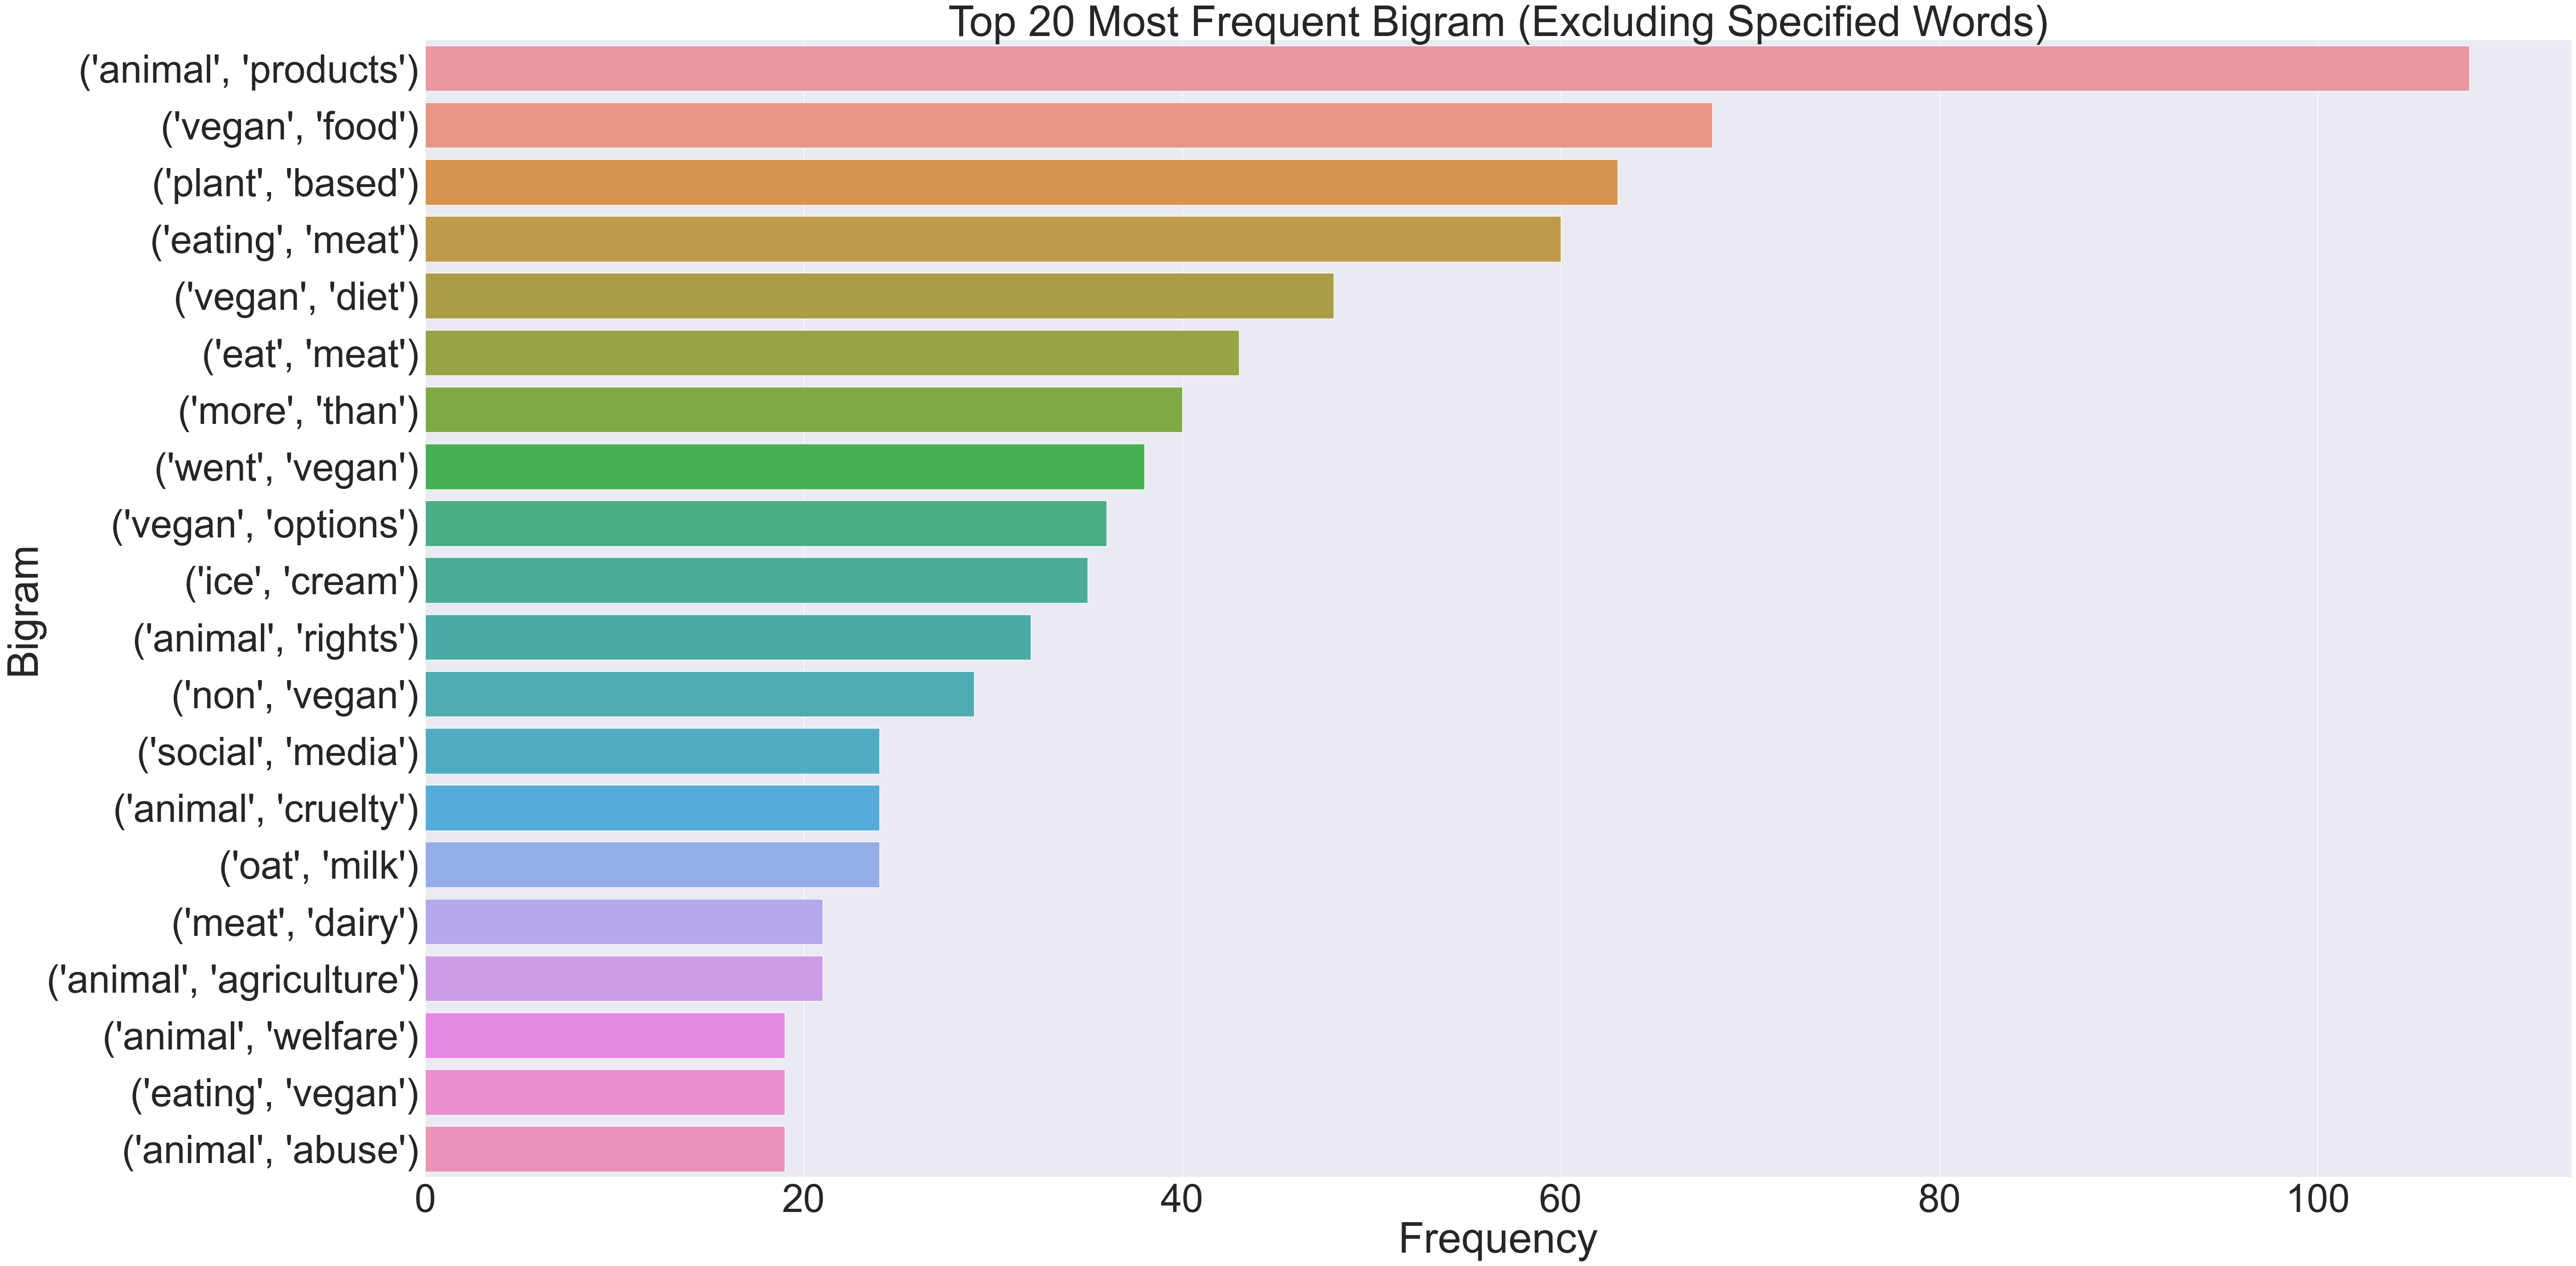

In [27]:
#drop words
drop_words = [ "in", "the", "a", "just", "all", "and", "was", "of", "can",
              "it", "think", "have", "i’m", "i’ve",
              'i', 'me', 'my', 'im', 'are', 'be', 'not', 'so', 'you', 'on', 'or', 'just', 'if', 'was',
'what', 'like', 'they', 'as', 'do', 'its', 'about', 'some', 'dont', 'any', 'from', 
'at', 'all', 'can', 'how','them', 'we', 'would', 'in', 'is', 'the', 'to', 'and', 'a', 'make', 'there'
, 'been', 'ive', 'an', 'know', 'out', 'want', 'has', 'because', 'for', 'it', 'of', 'had', 'time',
'get', 'if', 'am', 'your', 'think', 'up', 'no', 'he', 'will', 'really', 'also', 'have',
'with', 'this', 'but', 'that', 'who', 'which', 'by', 'much', 'she', 'now', 'these', 'help',
'going', 'still', 'feel', 'then', 'their', 'being', 'were', 'only', 'something', 'here', 'very',
'our', 'go', 'should', 'made', 'most', 'where', 'could', 'anyone', 'need', 'why', 'find', 'got'
, 'even', 'other', 'one', 'cant', 'love', 'first', 'use', 'years', 'thanks', 'things','thing'
, 'while', 'every', 'few', 'her', 'lot', 'best', 'into', 'say', 'him', 'since','did', 'please'
, 'said', 'sure', 'used', 'back', 'new', 'off', 'trying', 'work', 'id', 'didnt', 'those',
                "it\'s", "im", "i\'m", "it.", "don\'t", 
              "hacktivistshttpsveganhacktivistsorg",
             "click", "link", "linkedin", "notification", "email", "🔥",
             "interested", "apply", "subscribe", "bell", "playground",
             "resume", "job", "apply", "people"]

filtered_words = [word for word in words if word not in drop_words] 
bigram_counts = count_bigrams(filtered_words)

# Convert the Counter object to a Pandas DataFrame
bigram_counts_df = pd.DataFrame.from_dict(bigram_counts, orient='index', columns=['Frequency']).reset_index()
bigram_counts_df.rename(columns={'index': 'Bigram'}, inplace=True)

# Sort the DataFrame by Frequency in descending order and take the top 20 most frequent words
top_bigram = bigram_counts_df.sort_values('Frequency', ascending=False).head(20)
print(top_bigram)

plt.figure(figsize=(60, 32))
sns.set(font_scale= 5.5)
sns.barplot(y=top_bigram['Bigram'], x=top_bigram['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 20 Most Frequent Bigram (Excluding Specified Words)')
plt.show()

# TRIGRAMS

                               Trigram  Frequency
7806       (consume, animal, products)         11
2154     (consuming, animal, products)         10
17413             (youre, taking, bit)          8
5998              (stop, eating, meat)          8
17497       (activism, animals, vegan)          8
17498       (animals, vegan, requests)          8
17499       (vegan, requests, animals)          8
17414          (taking, bit, activism)          8
6067        (eating, animal, products)          8
17412           (needs, youre, taking)          8
9854             (lays, chaat, recipe)          7
17423     (role, animals, description)          6
17421  (compensation, volunteer, role)          6
26928       (social, media, community)          6
17422       (volunteer, role, animals)          6
11333               (lab, grown, meat)          5
12327          (stopped, eating, meat)          5
41221              (dairy, ice, cream)          5
20649              (meat, dairy, eggs)          5


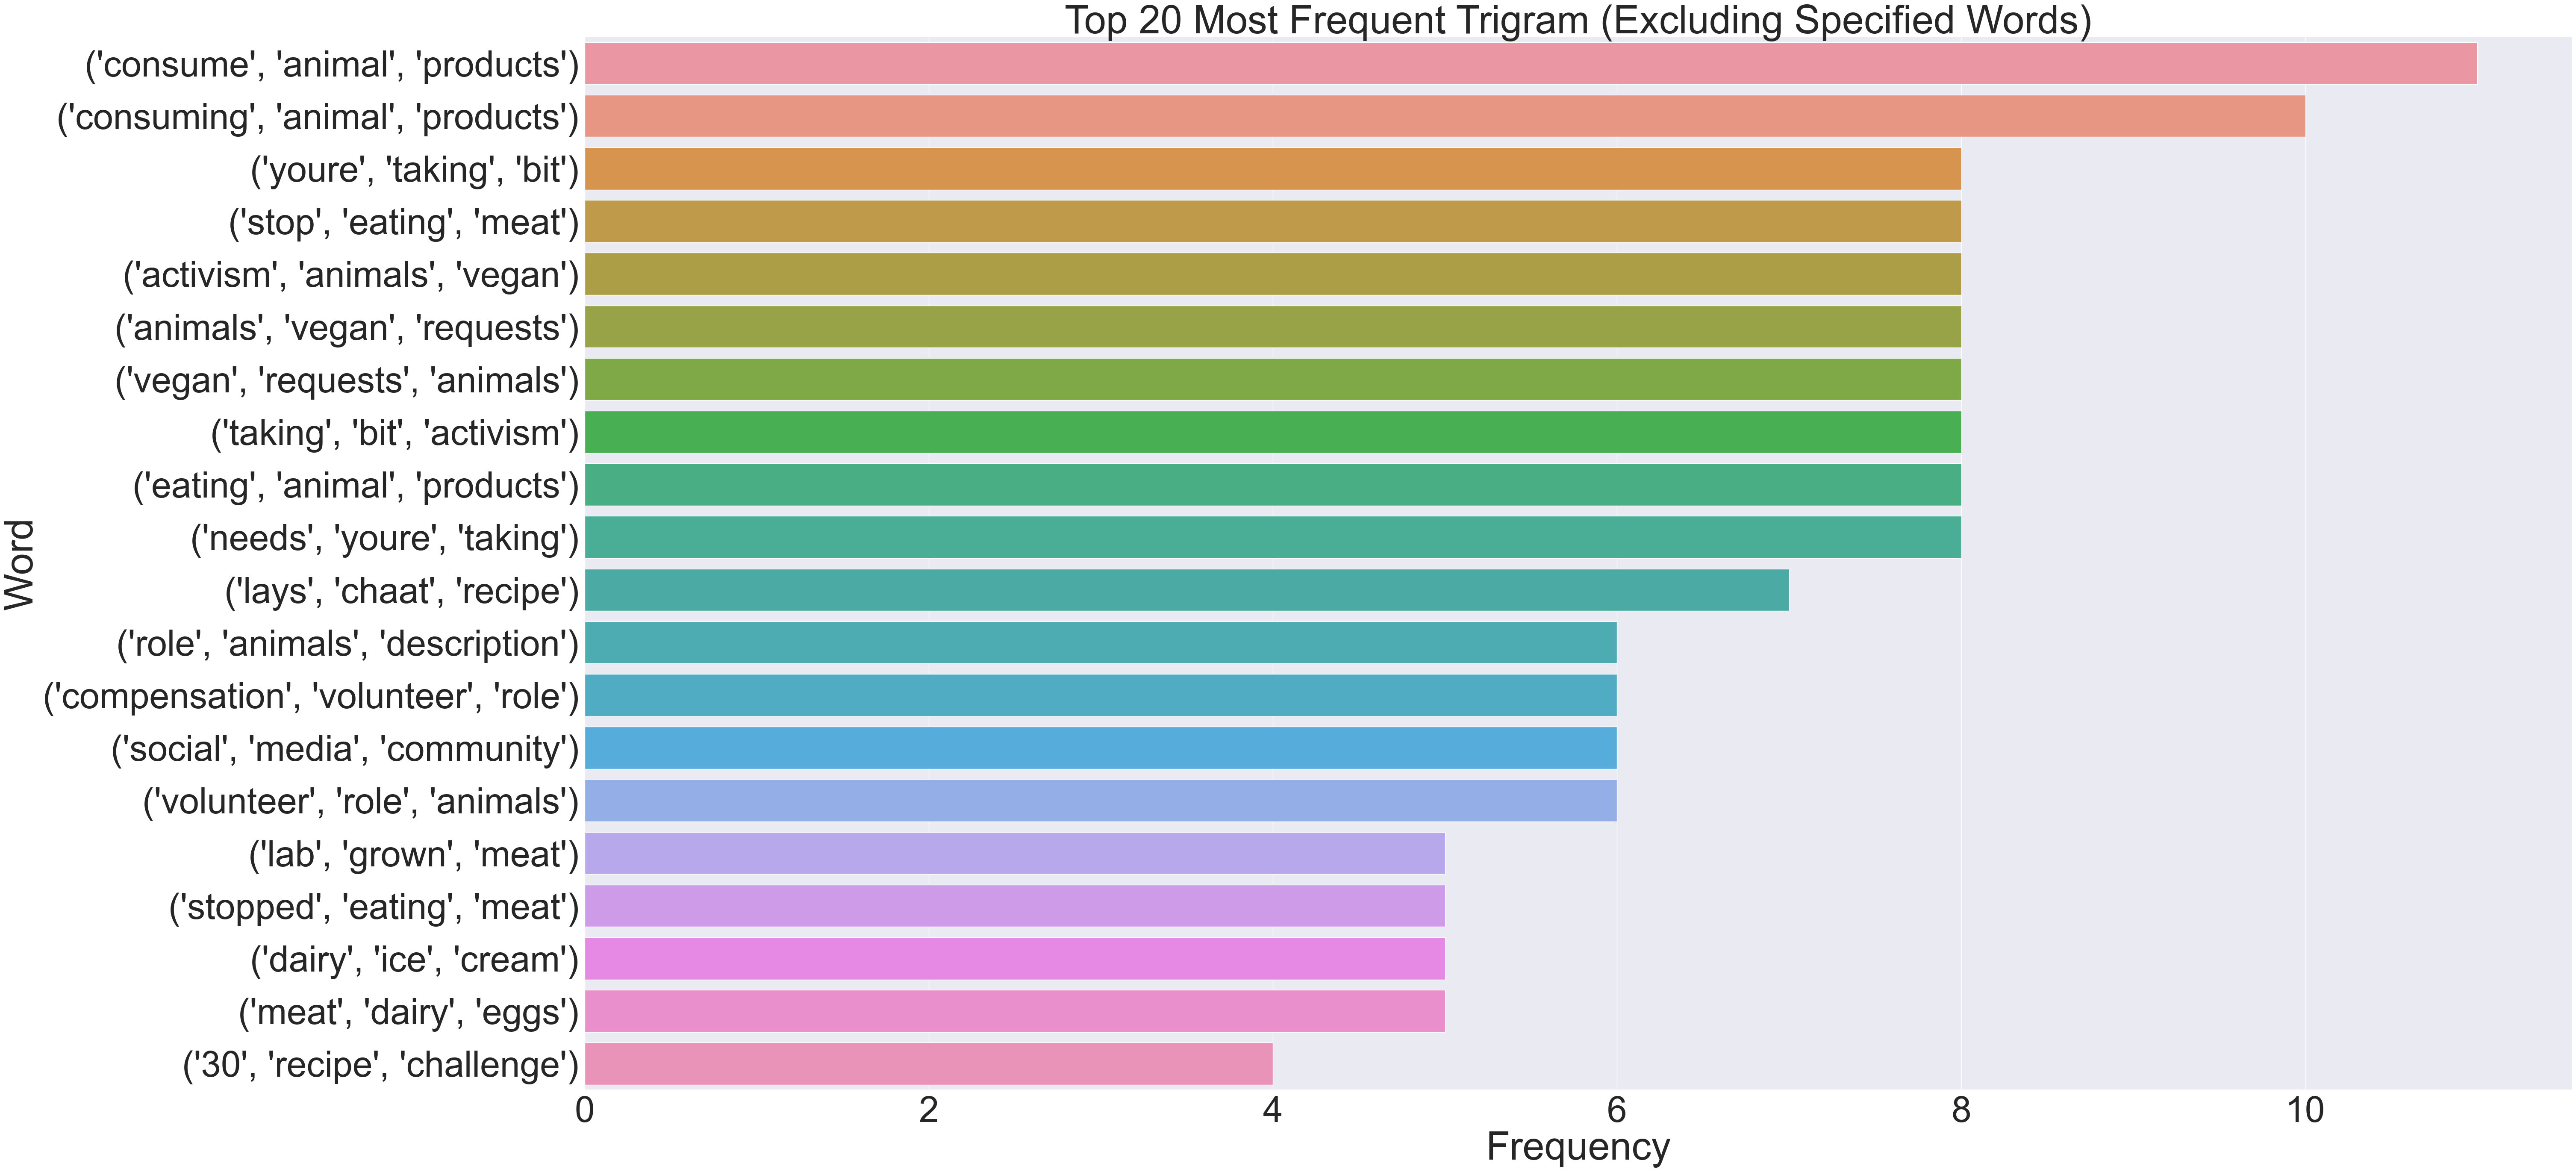

In [28]:
#drop words
drop_words = ['i', 'me', 'my', 'im', 'are', 'be', 'not', 'so', 'you', 'on', 'or', 'just', 'if', 'was',
'what', 'like', 'they', 'as', 'do', 'its', 'about', 'some', 'dont', 'any', 'from', 
'at', 'all', 'can', 'how','them', 'we', 'would', 'in', 'is', 'the', 'to', 'and', 'a', 'make', 'there'
, 'been', 'ive', 'an', 'know', 'out', 'want', 'has', 'because', 'for', 'it', 'of', 'had', 'time',
'get', 'if', 'am', 'your', 'think', 'up', 'no', 'he', 'will', 'really', 'also', 'have',
'with', 'this', 'but', 'that', 'who', 'which', 'by', 'much', 'she', 'now', 'these', 'help',
'going', 'still', 'feel', 'then', 'their', 'being', 'were', 'only', 'something', 'here', 'very',
'our', 'go', 'should', 'made', 'most', 'where', 'could', 'anyone', 'need', 'why', 'find', 'got'
, 'even', 'other', 'one', 'cant', 'love', 'first', 'use', 'years', 'thanks', 'things','thing'
, 'while', 'every', 'few', 'her', 'lot', 'best', 'into', 'say', 'him', 'since','did', 'please'
, 'said', 'sure', 'used', 'back', 'new', 'off', 'trying', 'work', 'id', 'didnt', 'those'
, 'right', 'life', 'does', 'looking', 'than', 'too', 'try', 'us', 'many', 'thats', 'better'
, 'making', 'when', 'found', 'without', '2', 'little', 'same', 'went', 'friends', 'x200b', 'isnt'
, 'etc', 'last', 'myself', 'based', 'else', 'put', 'long', 'take', 'family', 'wondering', 'guy',
    "to", "need", "know", "told", "make", "eat",
              "lot", "am", "it", "dont", "rest",
              "it\'s", "im", "i\'m", "it.", "don\'t", 
              "the", "long", "few",
              "any", "a", "of", "i", "im",
              "idea", "guys", "past",
              "hacktivistshttpsveganhacktivistsorg",
             "click", "link", "linkedin", "notification", "email", "🔥",
             "interested", "apply", "subscribe", "bell", "playground",
             "resume", "job", "apply", "website", "days", "vh", "martin"]


filtered_words = [word for word in words if word not in drop_words] 
trigram_counts = count_trigrams(filtered_words)

# Convert the Counter object to a Pandas DataFrame
trigram_counts_df = pd.DataFrame.from_dict(trigram_counts, orient='index', columns=['Frequency']).reset_index()
trigram_counts_df.rename(columns={'index': 'Trigram'}, inplace=True)

# Sort the DataFrame by Frequency in descending order and take the top 20 most frequent words
top_trigram = trigram_counts_df.sort_values('Frequency', ascending=False).head(20)
print(top_trigram)

plt.figure(figsize=(60, 32))
sns.set(font_scale= 5.5)
sns.barplot(y = top_trigram['Trigram'], x = top_trigram['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Frequent Trigram (Excluding Specified Words)')
plt.show()

# Quart-Gram

                                        4-Gram  Frequency
29275               (request, below, on, here)          8
29281            (animals, vegan, find, other)          8
29280         (activism, animals, vegan, find)          8
29167               (needs, if, youre, taking)          8
29283         (find, other, requests, animals)          8
29168                  (if, youre, taking, on)          8
29169                (youre, taking, on, this)          8
29170               (taking, on, this, little)          8
29274               (this, request, below, on)          8
29171                  (on, this, little, bit)          8
29172               (this, little, bit, about)          8
29173                (little, bit, about, you)          8
29174              (bit, about, you, activism)          8
29282           (vegan, find, other, requests)          8
29183      (compensation, this, is, volunteer)          6
29184              (this, is, volunteer, role)          6
12035         

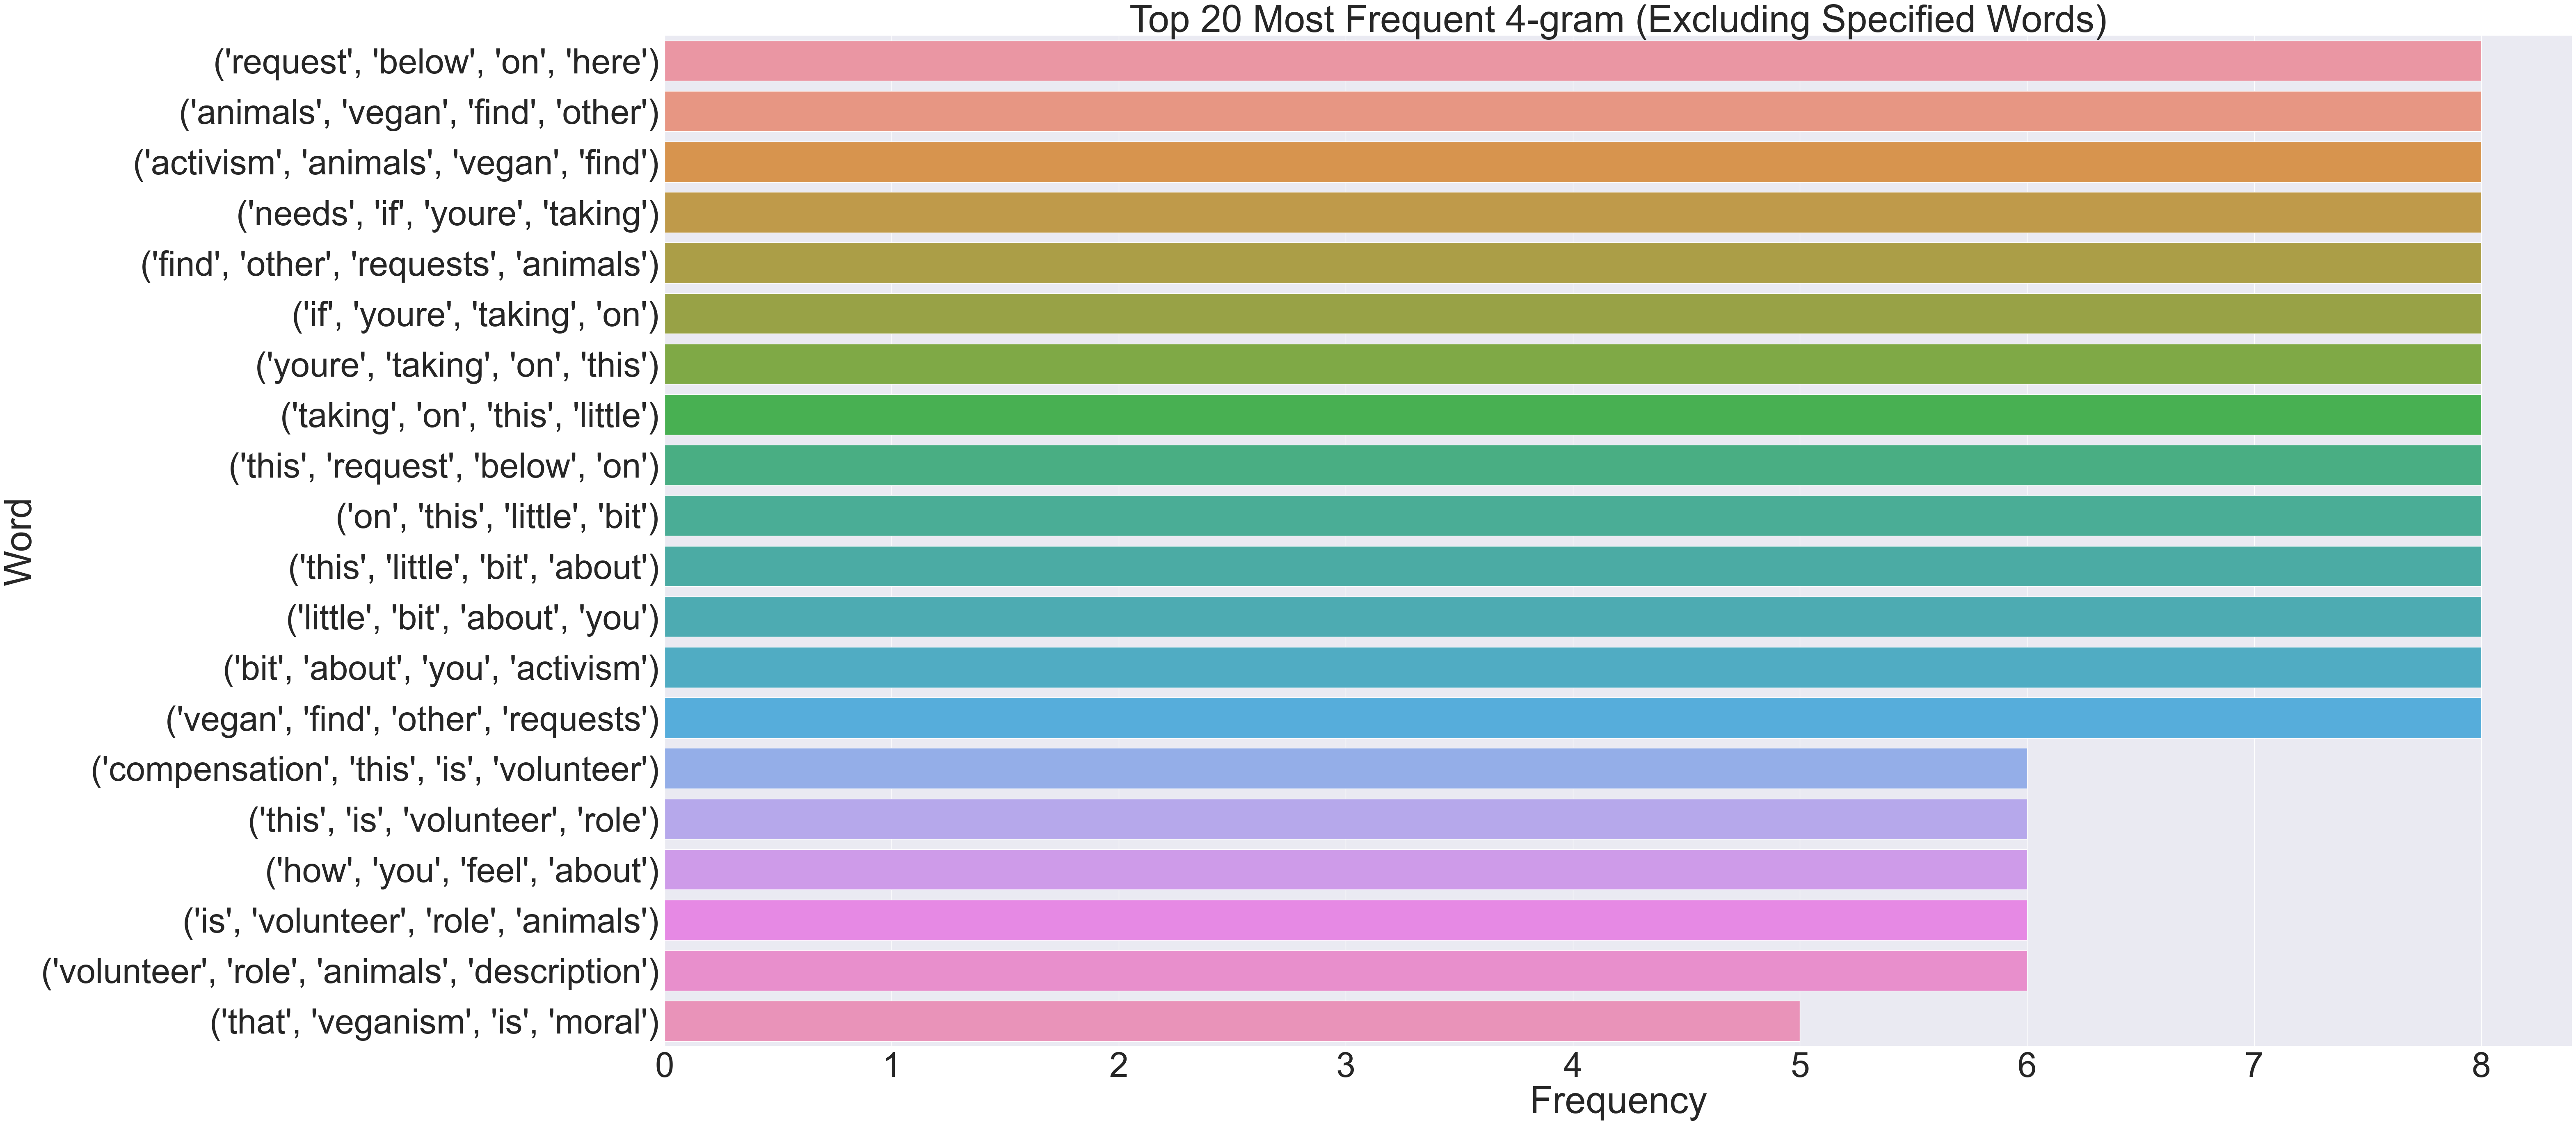

In [29]:
def count_trigrams(x):
    trigrams = [tuple(x[i:i+4]) for i in range(len(x)-1)]
    trigram_counts = Counter(trigrams)
    return trigram_counts

#drop words
drop_words = ["ive", "i've", "when", "in", "so", "much", "to", "it", "do", "and",
              "with", "but", "time", "decsription", "help", "he", "her", "for", "or", "by",
              "it’s", "im", "i’m", "it.", "don’t", 
              "the", "long", "few",
              "any", "a", "of", "i", "im",
              "idea", "guys", "past",
              "hacktivistshttpsveganhacktivistsorg",
             "click", "link", "linkedin", "notification", "email", "🔥",
             "interested", "apply", "subscribe", "bell", "playground",
             "resume", "job", "apply", "website", "days", "thank", "please", "thanks", "vh", "your"]


filtered_words = [word for word in words if word not in drop_words] 
trigram_counts = count_trigrams(filtered_words)

# Convert the Counter object to a Pandas DataFrame
trigram_counts_df = pd.DataFrame.from_dict(trigram_counts, orient='index', columns=['Frequency']).reset_index()
trigram_counts_df.rename(columns={'index': '4-Gram'}, inplace=True)

# Sort the DataFrame by Frequency in descending order and take the top 20 most frequent words
top_trigram = trigram_counts_df.sort_values('Frequency', ascending=False).head(20)
print(top_trigram)

plt.figure(figsize=(60, 32))
sns.barplot(y=top_trigram['4-Gram'], x=top_trigram['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Frequent 4-gram (Excluding Specified Words)')
plt.show()

# Sentiment Analysis

On top of analysing top keywords, a cursory analysis of the general mood of the target demographic will help find out how we can better customise our products.

This can be done using VADER or TextBlob to check the polarity and the subjectivity scores.

Polarity scores are numerical values that range from **-1 to 1**, where -1 indicates a very negative sentiment, 0 indicates a neutral sentiment, and 1 indicates a very positive sentiment. Polarity scores can help you quickly identify the overall mood of a text, whether it is a product review, a social media post, or a customer feedback.  

Subjectivity scores are numerical values that range from **0 to 1**, where 0 indicates a very objective text, and 1 indicates a very subjective text. Objective texts are based on facts, evidence, or logic, while subjective texts are based on opinions, feelings, or personal views. Subjectivity scores can help you filter out irrelevant or biased texts, and focus on the ones that express genuine sentiments. For example, you can use subjectivity scores to exclude texts that are purely factual, such as product specifications, or texts that are overly promotional, such as advertisements.

In [30]:
# Polarity of Meat topics
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

def mv(subreddit, category = "title"):    
    df = original_df[original_df["subreddit"] == str(subreddit)]
    df_edited = df[category].str.lower().values.tolist()
    return df_edited

meats = mv("meat", "title")


print(meats)

sid = SIA()

sentiments_meat = []
for sentence in meats:
    ss = sid.polarity_scores(sentence) 
    sentiments_meat.append(ss)

sentiments_meat = pd.DataFrame(sentiments_meat)
sentiments_meat.describe()

['what’s a good price for meats?', 'why does the restaurant think this is medium?', 'why do deli hams flower like this when at their end?', 'snake river farms wagyu short rib. melts like butter', 'where do you guys get fat/tallow for cheap?', 'pork feet, ears and skin', 'the united states is getting a new $140 million lab grown meat facility that can produce up to 30 million lbs of meat per year', 'weston grinder differences', 'filet mignon', 'cooked some blacktip shark', 'i’m cooking chicken and this yellow liquid is oozing from it. what is it? should i be worried?', 'best place to buy meat online', 'smoked mangalitsa ham hock for red beans and rice tonight.', 'unfamiliar cut as grocery substitution.', 'the top 👍 tasty', 'how to cook pectoral meat?', 'grilled meat', 'grilled meat at home 🥰', "how to cook 'half picnic' pork shoulder?", 'what can i do with these trimmings from a london broil?', 'ground venison with 10% beef fat… safe for jerky?', 'chicken from burger king?', 'beef fille

,neg,neu,pos,compound
count,2390.000000,2390.000000,2390.000000,2390.000000
mean,0.033673,0.874719,0.091607,0.103151
std,0.096872,0.184166,0.163468,0.282240
min,0.000000,0.133000,0.000000,-0.814300
25%,0.000000,0.756000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.162000,0.272800
max,0.688000,1.000000,0.857000,0.905100


In [31]:
# Polarity of Vegan topics
def mv(subreddit, category = "title"):    
    df = original_df[original_df["subreddit"] == str(subreddit)]
    df_edited = df[category].str.lower().values.tolist()
    return df_edited

vegans = mv("vegan", "title")
print(vegans)

sid = SIA()

sentiment = []
for sentence in vegans:
    ss = sid.polarity_scores(sentence) 
    sentiment.append(ss)

sentiment_vegan = pd.DataFrame(sentiment)
sentiment_vegan.describe()

#Negative, Neutral, Positive, Compound

['have a skill to volunteer for animals? join our discord, save lives! 🐥', "we're looking for vegan graphic designers & ui/ux professionals! 🌱 🐤", 'my dad mixed real chicken into my pasta', 'i finally found the vegan babybel!', 'my roommates bf threw out my food', 'oslo stops serving meat in kindergartens owned by the municipality', 'article: radical vegans are trying to change your diet: the impossible fight to persuade people to stop eating meat', 'was excited to get a note from my kids’ school announcing daily vegan lunches!', 'girl kills a spider and then laughs at me', "i'm begging y'all to spread this news", 'am i being ridiculous?', 'my garden didn’t do well this year but i’m happy for the late harvest, new england, us', "why the hell do people feel the need to come to this sub and tell everyone why they can't/won't go vegan?", "productive but unsettling reddit conversation i had with a non-vegan. curious about others' thoughts.", 'what is your personal best, convincing one line

,neg,neu,pos,compound
count,3318.000000,3318.000000,3318.000000,3318.000000
mean,0.078370,0.804984,0.112725,0.045342
std,0.163484,0.239988,0.195673,0.354584
min,0.000000,0.000000,0.000000,-0.934800
25%,0.000000,0.658000,0.000000,0.000000
50%,0.000000,0.888500,0.000000,0.000000
75%,0.079000,1.000000,0.191000,0.273200
max,1.000000,1.000000,1.000000,0.972100


In [32]:
# Subjectivity of Meat Title Posts
from textblob import TextBlob


    
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
  
    #Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
  
    #Create two new columns ‘Subjectivity’ & ‘Polarity’
    tweet['TextBlob_Subjectivity'] = tweet['tweet'].apply(getSubjectivity)
    tweet['TextBlob_Polarity'] = tweet['tweet'].apply(getPolarity)
    
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

subjectivity = []

for meat in meats:
    subjectivity.append(getSubjectivity(str(meat)))
    
df_describe = pd.DataFrame(subjectivity)
df_describe.describe()
# Subjectivity 0 is not-subjective and 1 is very subjective.

,0
count,2390.00000
mean,0.25239
std,0.31290
min,0.00000
25%,0.00000
50%,0.00000
75%,0.50000
max,1.00000


In [33]:
# subjectivity of vegan posts
subject_vegan = []
for vegan in vegans:
    subject_vegan.append(getSubjectivity(str(vegan)))
    
df_describe = pd.DataFrame(subject_vegan)
df_describe.describe()
# Subjectivity 0 is not-subjective and 1 is very subjectiv

,0
count,3318.000000
mean,0.281793
std,0.339656
min,0.000000
25%,0.000000
50%,0.000000
75%,0.535119
max,1.000000


In [34]:
df = original_df.drop(['score'], axis=1)
df.groupby("subreddit").describe()

title                                                      id  \
          count unique                        top freq first last count   
subreddit                                                                 
meat       2390   2373  What cut of beef is this?    3   NaN  NaN  2390   
vegan      3318   3256                      Hmph.    4   NaN  NaN  3318   

                               ...              created       \
          unique     top freq  ...                  top freq   
subreddit                      ...                             
meat        2390  zowntt    1  ...  2022-12-18 11:35:43    1   
vegan       3318  x34hgy    1  ...  2022-09-01 10:52:29    1   

                                                     body         \
                         first                 last count unique   
subreddit                                                          
meat       2018-06-14 01:04:00  2023-09-21 07:00:01   526    525   
vegan      2016-03-05 14:03:15  2023-09-21 15:23:17  1289   1289   

                                                                              
                                                         top freq first last  
subreddit                                                                     
meat       I will admit that I havent done marinade's, re...    2   NaN  NaN  
vegan      Interested in helping animals? Read below! 🐟\n...    1   NaN  NaN  

[2 rows x 30 columns]